# K-means Clustering

In [1]:
import os
import cv2 as cv
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io as sio

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from skimage import io


In [2]:
root_dir = '/home/leedo/ML_Andrew_Ng/ML-exe/'

In [3]:
data1 = sio.loadmat(os.path.join(root_dir,'exe7-Kmeans and PCA/data/ex7data1.mat'))
data2 = sio.loadmat(os.path.join(root_dir,'exe7-Kmeans and PCA/data/ex7data2.mat'))
data1 = pd.DataFrame(data1.get('X'),columns=['X1','X2'])
data2 = pd.DataFrame(data2.get('X'),columns=['X1','X2'])
data1.head()

,X1,X2
0,3.381563,3.389113
1,4.527875,5.854178
2,2.655682,4.411995
3,2.765235,3.715414
4,2.846560,4.175506


Text(0, 0.5, 'x2')

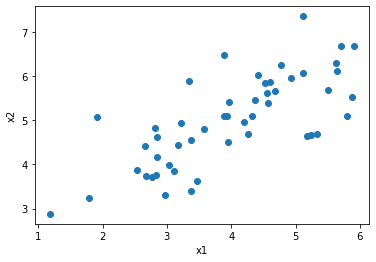

In [4]:
plt.scatter(data1['X1'],data1['X2'])
plt.xlabel('x1')
plt.ylabel('x2')

Text(0, 0.5, 'x2')

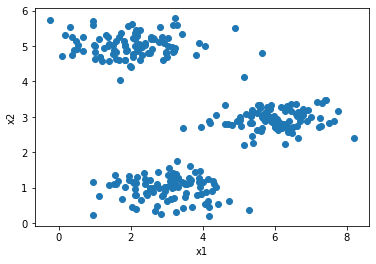

In [5]:
plt.scatter(data2['X1'],data2['X2'])
plt.xlabel('x1')
plt.ylabel('x2')

In [6]:
## 计算欧氏距离
def xy_distance(x,y):
    dis = pow(x[0]-y[0],2) + pow(x[1]- y[1],2)
    return np.sqrt(dis)

xy_distance([3,3],[1,1])

2.8284271247461903

In [7]:
def rand_init_centroid(data,k):
    return data.sample(k).values
    
def search_closest_centroids(data,centroids,k):
    
    
    compute_data = np.zeros((len(data),2))
    
    for i in range(len(data)):
        distance = []
        for j in range(k):
            distance.append(xy_distance(data[i,:],centroids[j,:]))
        compute_data[i,:] = [np.argmin(distance),distance[np.argmin(distance)]]
    return compute_data

def computeMeans(data,mat,k):
    centroids = np.zeros((k,2))
    for i in range(k):
        pointsInCluster = data[np.nonzero(mat[:,0]==i)[0]]
        centroids[i,:] = np.mean(pointsInCluster,axis=0)
    return centroids


In [8]:

def kmeans(maxiters,data,k,init_centroids):
    centroids = init_centroids
    for i in range(maxiters):
        compute_data = search_closest_centroids(data,centroids,k)
        
        centroids = computeMeans(data,compute_data,k)
    return compute_data,centroids

In [9]:
init_centroids = rand_init_centroid(data2,k=3)

res ,final_centroids= kmeans(400,data2.values,3,init_centroids)
res[0,:]

array([1.        , 0.43272128])

In [10]:
data_with_idx = data2
data_with_idx['idx'] = res[:,0]
data_with_idx.head(10)

,X1,X2,idx
0,1.842080,4.607572,1.0
1,5.658583,4.799964,2.0
2,6.352579,3.290854,2.0
3,2.904017,4.612204,1.0
4,3.231979,4.939894,1.0
5,1.247923,4.932678,1.0
6,1.976199,4.434897,1.0
7,2.234541,5.055472,1.0
8,2.983408,4.840464,1.0
9,2.979704,4.806711,1.0


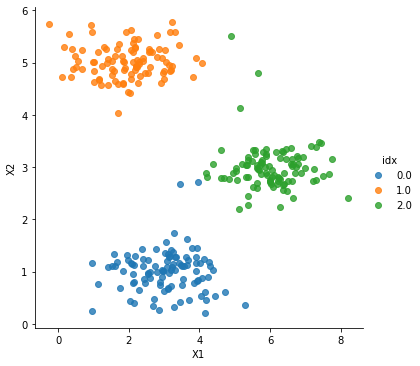

In [11]:
sns.lmplot(x='X1',y='X2',hue='idx',data = data_with_idx,fit_reg=False)

## 使用sklearn中的kmeans

In [12]:
data3 = sio.loadmat(os.path.join(root_dir,'exe7-Kmeans and PCA/data/ex7data2.mat'))
data3 = pd.DataFrame(data3.get('X'),columns=['X1','X2'])
sk_kmeans = KMeans(n_clusters=3)
sk_kmeans.fit(data3)

KMeans(n_clusters=3)

In [13]:
sk_idx = sk_kmeans.predict(data3)
data3['idx'] = sk_idx
data3.head()

,X1,X2,idx
0,1.842080,4.607572,1
1,5.658583,4.799964,2
2,6.352579,3.290854,2
3,2.904017,4.612204,1
4,3.231979,4.939894,1


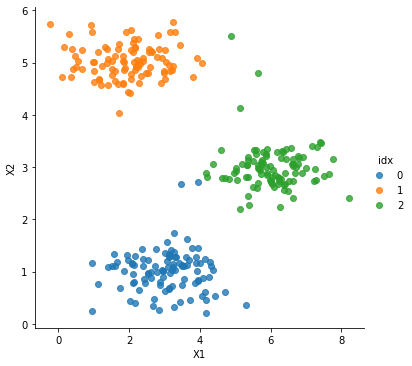

In [14]:
sns.lmplot(x = 'X1',y = 'X2',hue = 'idx',data = data3,fit_reg =False)

## 使用K-Means进行图像压缩

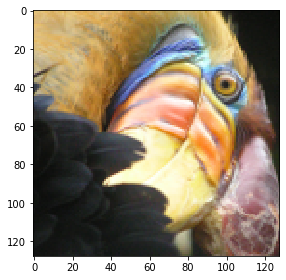

In [15]:
#img = cv.imread(os.path.join(root_dir,'exe7-Kmeans and PCA/data/bird_small.png'))
#cv.imshow('bird_small',img)
#cv.waitKey(0)
img = io.imread(os.path.join(root_dir,'exe7-Kmeans and PCA/data/bird_small.png'))/255
io.imshow(img)

In [16]:
img.shape

(128, 128, 3)

In [17]:
img_tmp = img.reshape(128*128,3)
img_tmp.shape

(16384, 3)

In [18]:
Kmeans = KMeans(n_clusters=16)
Kmeans.fit(img_tmp)

KMeans(n_clusters=16)

In [19]:
centroids = Kmeans.cluster_centers_
C = Kmeans.predict(img_tmp)
print(centroids[C].shape)

(16384, 3)


In [20]:
img_compress = centroids[C].reshape(128,128,3) ##以聚类中心代替原来的像素值

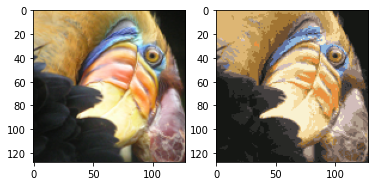

In [21]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(img_compress)
plt.show()

# PCA主成分分析

In [22]:
##可视化数据
data = sio.loadmat(os.path.join(root_dir,'exe7-Kmeans and PCA/data/ex7data1.mat'))
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [23]:
data_pca = pd.DataFrame(data.get('X'),columns=['X1','X2'])
data_pca.head()

,X1,X2
0,3.381563,3.389113
1,4.527875,5.854178
2,2.655682,4.411995
3,2.765235,3.715414
4,2.846560,4.175506


<AxesSubplot:xlabel='X1', ylabel='X2'>

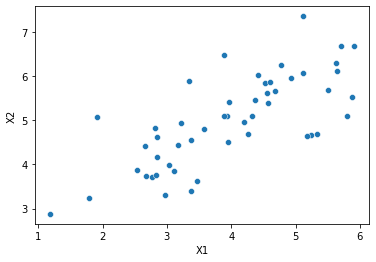

In [24]:
sns.scatterplot(x = 'X1',y = 'X2',data = data_pca)

In [25]:
#归一化
def feature_normolization(df):
    m,n = df.shape[0],df.shape[1]
    df_copy = df.copy()

    for i in range(n):
        df_copy[:,i] = (df[:,i] - df[:,i].mean())/df[:,i].std()
    return df_copy

In [26]:
data_pca = feature_normolization(data_pca.values)
data_pca

array([[-0.52331306, -1.59279252],
       [ 0.46381518,  0.84034523],
       [-1.14839331, -0.58315891],
       [-1.05405373, -1.27071783],
       [-0.98402167, -0.81658417],
       [-0.08490201,  1.46633377],
       [-0.44215763, -1.35221333],
       [ 1.65512709,  1.65622961],
       [-0.05198776,  0.09440201],
       [ 0.49305926,  0.61245677],
       [ 0.50359639,  0.38973079],
       [ 0.32935623,  0.45242294],
       [ 0.17431804, -0.04748911],
       [ 1.08056741, -0.33689741],
       [-0.99325294, -1.21879564],
       [ 1.41742949,  1.2923503 ],
       [ 0.60026548,  0.65385535],
       [-0.98061738, -0.37147508],
       [ 0.96523763,  2.32981886],
       [ 1.02758927, -0.35168199],
       [ 1.47948139,  1.65649752],
       [-0.35270365, -0.19743438],
       [ 1.42096706,  1.10315449],
       [ 0.23612558, -0.30931801],
       [-1.25101023, -1.1038306 ],
       [-0.65914279, -0.05946964],
       [ 0.80965726,  0.93988073],
       [ 1.55321995,  0.10421963],
       [-1.00960756,

In [27]:
def compute_sigma(X):
    m,n = X.shape[0],X.shape[1]
    return (X.T @ X)/m

In [28]:
sigma = compute_sigma(data_pca)
print(sigma)
U,S,V = np.linalg.svd(sigma)
U

[[1.         0.73553038]
 [0.73553038 1.        ]]


array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [29]:
u = U[:,0]
z = u.T @ data_pca.T
z[:10]

array([ 1.49631261, -0.92218067,  1.22439232,  1.64386173,  1.2732206 ,
       -0.97681976,  1.26881187, -2.34148278, -0.02999141, -0.78171789])

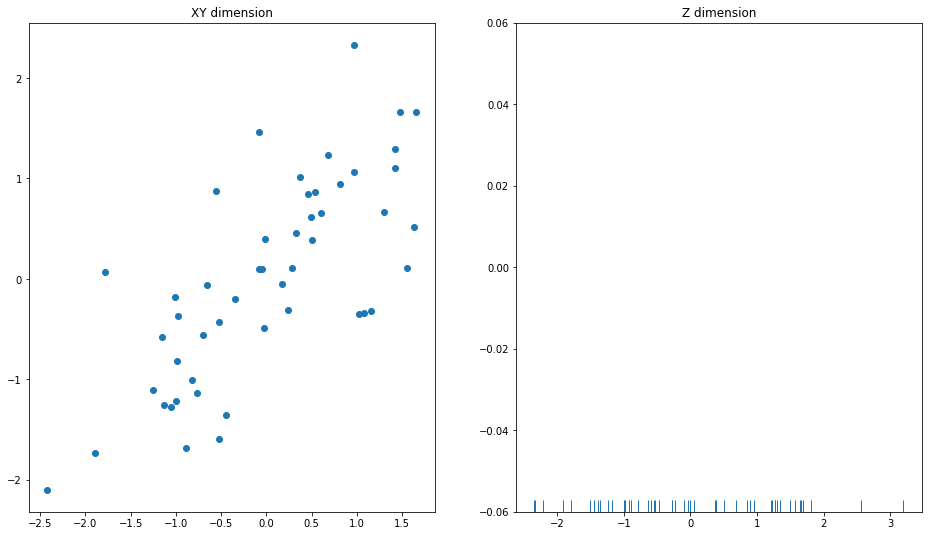

In [30]:
fig, ax = plt.subplots(1,2,figsize = (16,9))
ax[0].scatter(data_pca[:,0],data_pca[:,1])
ax[0].set_title('XY dimension')
#用rugplot制出一维数组中数据点实际的分布位置情况
sns.rugplot(z, ax = ax[1])
ax[1].set_title('Z dimension')
plt.show()

In [31]:
## 数据还原
u = U[:,0]
z = u.T @ data_pca.T
u = u.reshape(len(u),1)
Z = np.array([z])
x_pro = Z.T @ u.T
x_pro.shape

(50, 2)

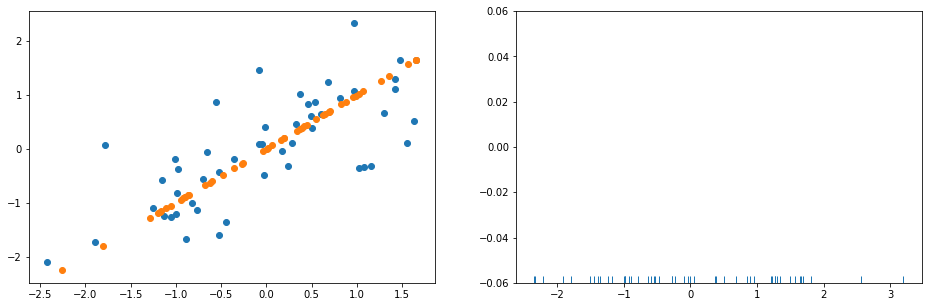

In [32]:
##数据可视化
fig, ax = plt.subplots(1,2,figsize = (16,5))
#原始数据
ax[0].scatter(data_pca[:,0],data_pca[:,1])
#反投影数据
ax[0].scatter(x_pro[:,0],x_pro[:,1])
#降维后数据
sns.rugplot(z,ax = ax[1])
#plt.legend()
plt.show()

## PCA on Fcaes

In [33]:
data = sio.loadmat(os.path.join(root_dir,'exe7-Kmeans and PCA/data/ex7faces.mat'))
data_faces = pd.DataFrame(data.get('X'))
data_faces.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-37.866314,-45.866314,-53.866314,-51.866314,-40.866314,-33.866314,-47.866314,-37.866314,-22.866314,-7.866314,...,-91.866314,-113.866314,-123.866314,-102.866314,-84.866314,-94.866314,-99.866314,-110.866314,-111.866314,-99.866314
1,8.133686,-0.866314,-8.866314,-15.866314,-17.866314,-16.866314,-15.866314,-21.866314,-42.866314,-28.866314,...,-47.866314,-54.866314,-54.866314,-59.866314,-74.866314,-86.866314,-70.866314,-34.866314,-8.866314,0.133686
2,-32.866314,-34.866314,-36.866314,-18.866314,6.133686,15.133686,-1.866314,-31.866314,-1.866314,13.133686,...,-36.866314,-41.866314,-46.866314,-51.866314,-73.866314,-96.866314,-105.866314,-110.866314,-111.866314,-111.866314
3,-84.866314,-64.866314,-47.866314,-42.866314,-38.866314,-28.866314,-17.866314,-11.866314,-10.866314,-12.866314,...,-37.866314,-38.866314,-41.866314,-45.866314,-48.866314,-55.866314,-56.866314,-56.866314,-57.866314,-53.866314
4,2.133686,6.133686,5.133686,9.133686,10.133686,11.133686,11.133686,11.133686,12.133686,12.133686,...,-42.866314,-59.866314,-72.866314,-70.866314,-68.866314,-56.866314,-30.866314,-9.866314,0.133686,-14.866314


In [34]:
def plot_image(X):
    m = X.shape[0]
    image_size = int(np.sqrt(X.shape[1]))
    fig,ax = plt.subplots(10,10,figsize=(10,10))
    for i in range(10):
        for j in range(10):
            ax[i][j].imshow(X[10*i+j,:].reshape((image_size,image_size)).T,cmap=plt.cm.gray)
    plt.show()

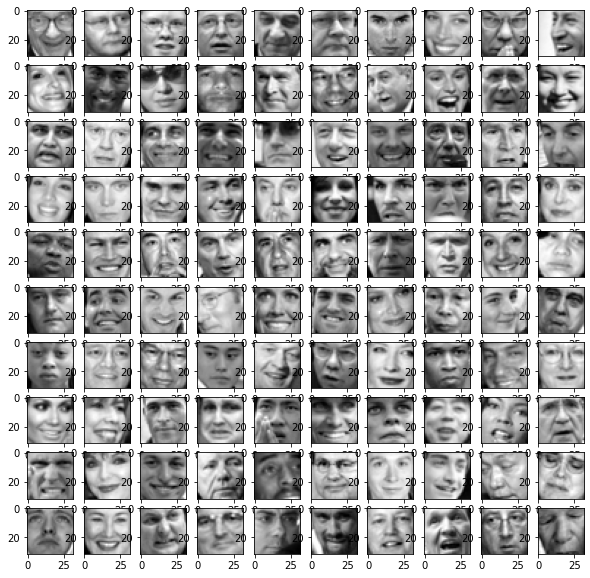

In [35]:
plot_image(data_faces.values[:100,:])

In [36]:
def normolization(X):
    m,n = X.shape[0],X.shape[1]
    X_copy = X.copy()
    for i in range(m):
        X_copy[i,:] = (X[i,:] - X[i,:].mean())/X[i,:].std()
    return X_copy


In [37]:
data_face = normolization(data_faces.values)
data_face.shape

(5000, 1024)

In [38]:
sigma_face = (data_face.T @ data_face) / len(data_face)
U2,S2,V2 = np.linalg.svd(sigma_face)
U2.shape

(1024, 1024)

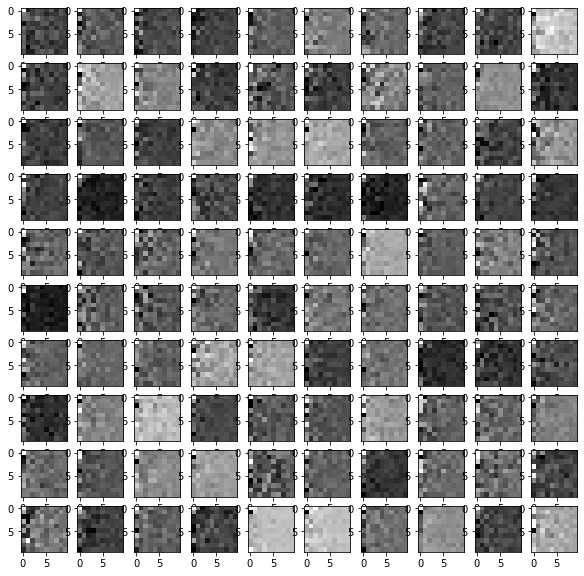

In [39]:
u_reduce = U2[:,:100]
z2 = u_reduce.T @ data_face.T
z2.shape
plot_image(z2.T[:100,:])

In [40]:
## 数据还原
x_pro2 = z2.T @ u_reduce.T
x_pro2.shape

(5000, 1024)

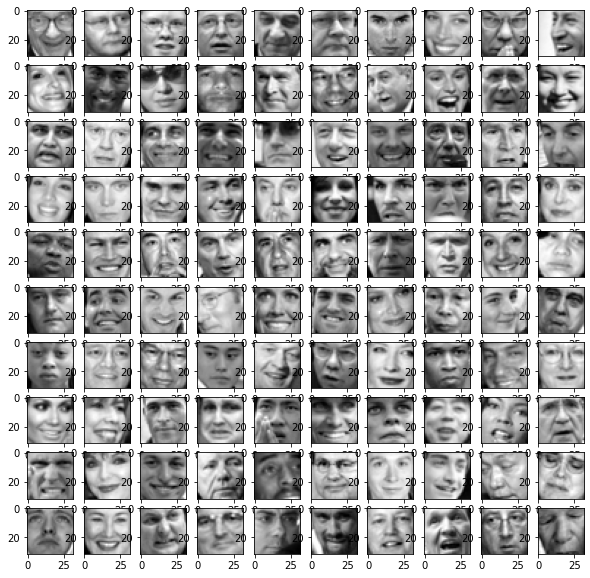

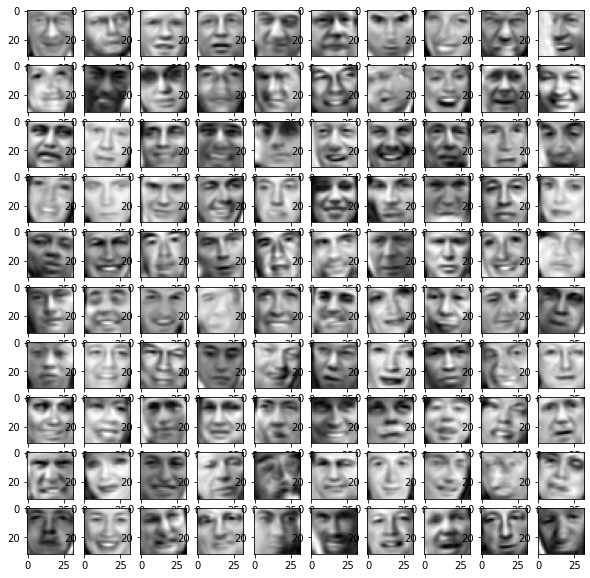

In [41]:
plot_image(data_faces.values[:100,:])##原始图像
plot_image(x_pro2[:100,:])##还原后的图像